In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
import os
import json
import requests
import zipfile
import seaborn as sns
import re
%matplotlib inline

## GATHERING DATA

In [2]:
# Reading csv file as dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
#importing tsv file with requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions-3.tsv', 'wb') as file:
    file.write(response.content)
#reading the tsv file as dataframe
image_predictions = pd.read_csv('image-predictions-3.tsv', sep='\t')

In [65]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**- tweet_json data was supposed to be extracted from twitter API but since it requires a developer account approval from twitter
    which usually takes time which I am in lack of it unfortunately, and in project notes, It was stated that I can download the     tweet_json.zip file and extract the data from it programatically to use it.**

In [4]:
#extracting tweet_json file from its zip format
with open ('tweet-json.zip', 'rb') as file:
    json_file = zipfile.ZipFile(file)
    json_file.extractall()
#Testing
json_file.namelist()

['tweet-json copy']

In [5]:
#creating dataframe for the tweet_json file
with open ('tweet-json copy', 'r') as file:
    tweet_json = pd.read_json(file, lines = True, encoding = 'utf-8')
# #Testing
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [145]:
#getting columns names in the json file
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [6]:
#reassigning the needed columns
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]
#Testing
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [7]:
#files gathered are
tweet_json, image_predictions, twitter_archive

(                      id  favorite_count  retweet_count
 0     892420643555336193           39467           8853
 1     892177421306343426           33819           6514
 2     891815181378084864           25461           4328
 3     891689557279858688           42908           8964
 4     891327558926688256           41048           9774
 ...                  ...             ...            ...
 2349  666049248165822465             111             41
 2350  666044226329800704             311            147
 2351  666033412701032449             128             47
 2352  666029285002620928             132             48
 2353  666020888022790149            2535            532
 
 [2354 rows x 3 columns],
                 tweet_id                                          jpg_url  \
 0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
 1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
 2     666033412701032449  https://pbs.twimg.com/media

## ASSESSING 

### Assessing each file visually and programatically ###

In [8]:
#Assessing Visually
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
872,761371037149827077,NaN,NaN,2016-08-05 01:19:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Oh. My. God. 13/10 magical af h...,7.116948e+17,4.196984e+09,2016-03-20 23:23:54 +0000,https://twitter.com/dog_rates/status/711694788...,13,10,None,None,None,None,None
927,754856583969079297,NaN,NaN,2016-07-18 01:53:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's not a fan of the fast mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
1542,689599056876867584,NaN,NaN,2016-01-20 00:03:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689599056...,11,10,None,None,None,None,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
1642,684097758874210310,NaN,NaN,2016-01-04 19:43:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lupe. This is how she sleeps. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,None,None,None,None
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None
720,783347506784731136,NaN,NaN,2016-10-04 16:46:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kenny. He just wants to...,6.742918e+17,4.196984e+09,2015-12-08 18:17:56 +0000,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None
1826,676440007570247681,NaN,NaN,2015-12-14 16:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,None,None,None,None


In [11]:
#Assesing programatically
twitter_archive.info()
twitter_archive.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
#Completeness Issue
#So many null values in multiple columns
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [150]:
#Accuracy Issue
#results with denominator higher than 10
twitter_archive.loc[twitter_archive.rating_denominator > 10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80


In [10]:
#Accuracy Issue
#results with numerator less than 10
twitter_archive.loc[twitter_archive.rating_numerator < 10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
229,This is Jerry. He's doing a distinguished tong...,6,10
315,When you're so blinded by your systematic plag...,0,10
387,"I was going to do 007/10, but the joke wasn't ...",7,10
462,RT @dog_rates: Meet Herschel. He's slightly bi...,7,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,This is a purebred Piers Morgan. Loves to Netf...,6,10
2353,Here is a very happy pup. Big fan of well-main...,9,10
2354,This is a western brown Mitsubishi terrier. Up...,7,10


In [11]:
#Consistency Issue
#Some dogs names aren't mentioned = None
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Autumn       1
Grady        1
Poppy        1
Hero         1
Goliath      1
Name: name, Length: 957, dtype: int64

In [12]:
#Assessing Visually
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1049,713761197720473600,https://pbs.twimg.com/media/CefKBOuWIAAIlKD.jpg,1,Brittany_spaniel,0.797936,True,English_springer,0.044718,True,Welsh_springer_spaniel,0.037911,True
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
482,675372240448454658,https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg,1,Chihuahua,0.416385,True,West_Highland_white_terrier,0.102933,True,Samoyed,0.087300,True
1596,798933969379225600,https://pbs.twimg.com/media/CxZiLcLXUAApMVy.jpg,1,Siberian_husky,0.703224,True,Eskimo_dog,0.229351,True,malamute,0.044351,True
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False
84,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
832,693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,washbasin,0.272451,False,doormat,0.165871,False,bathtub,0.066368,False
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True


In [14]:
#Assessing Programatically
image_predictions.info()
image_predictions.describe()
image_predictions.p1.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
remote_control          1
starfish                1
pole                    1
agama                   1
wild_boar               1
Name: p1, Length: 378, dtype: int64

In [13]:
#Accuracy Issue
#Some of dog kinds are classiffied as different things other than dogs(cowboy_boot, crash_helmet, coffee_mug...etc)
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
barbell                 1
espresso                1
revolver                1
peacock                 1
bighorn                 1
Name: p1, Length: 378, dtype: int64

In [14]:
#Assessing visually
tweet_json.sample(10)

,id,favorite_count,retweet_count
1122,730211855403241472,4180,1182
1525,690360449368465409,2925,1006
1674,682088079302213632,20108,11271
71,878604707211726852,30931,7582
972,750056684286914561,3444,1011
413,822859134160621569,14576,2622
85,875747767867523072,25773,4497
2270,667491009379606528,559,242
1038,744223424764059648,1868,424
2333,666287406224695296,152,71


In [156]:
#Assessing Programatically
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [15]:
#Completeness Issue
#Checking for data files completenesss
twitter_archive.shape, image_predictions.shape
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Quality Issues #
**twitter_archive**
 - Missing Values in many columns
 - Removing denomenator column after applying all values to 10
 - Denomenator and numerator should be in one column as dog_rate
 - tweet_id datatype need to be changed from int to str
 - timestamp, retweeted_status_timestamp need to be changed to date/time datatype instead of str
 - tweet_id in image_prediction datatype need to be changed from int to str
 - id column in tweet_json datatype need to be changed from int to str
 - Source column have html tags
 - Original tweet ratings only needed no retweets or replies to original tweet
 - tweet_id datatype need to be changed from int to str
 - timestamp, retweeted_status_timestamp need to be changed to date/time datatype instead of str
 
**image_predictions**
 - Some images aren't for dogs
 - tweet_id datatype need to be changed from int to str 

**tweet_json**
- id column datatype need to be changed from int to str 

# Tidiness #

 - Text column has two variables which should be in seperate columns
 - Some columns need to be compressed in one column like (doggo, floofer ...etc) to dog_stage 
 - Merging all dataframes into master one


# Cleaning #

In [139]:
#making copy of all dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Define - Quality ###
**Missing Values in many columns**
- removing columns with missing values

### Code ###

In [140]:
#removing columns with missing values
#specifiying columns with NaN values
twitter_archive_clean = twitter_archive_clean.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
#dropping columns
columns_to_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns = columns_to_drop, axis=1)

### Test ###

In [141]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Define - Quality ###
- Some rating_numerator values are decimal which makes the dog rate value is wrong (takes only the decimal value)
- we extract these values with regex and then replace it with the whole number

### Code ###

In [142]:
decimals = twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
decimal_values = []
decimal_index = []
for index, text in decimals['text'].iteritems():    
    decimal_values.append((re.search('\d+\.\d+', text).group()))
    decimal_index.append(index)
twitter_archive_clean.loc[decimal_index[0], 'rating_numerator'] = float(decimal_values[0])
twitter_archive_clean.loc[decimal_index[1], 'rating_numerator'] = float(decimal_values[1])
twitter_archive_clean.loc[decimal_index[2], 'rating_numerator'] = float(decimal_values[2])
twitter_archive_clean.loc[decimal_index[3], 'rating_numerator'] = float(decimal_values[3])

C:\Users\Ahmad\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Test ###

In [143]:
twitter_archive_clean['rating_numerator'].loc[45]

13.5

### Define - Tideness ###
**Text column has two variables which should be in seperate columns**
- splitting the text column
- creating two columns for the results of split

### Code ###

In [144]:
# creating new column while splitting the text column
twitter_archive_clean['short_urls'] = twitter_archive_clean.text.apply(lambda x :x.strip().split(' ')[-1])
# drop the expanded_urls
twitter_archive_clean.drop('expanded_urls', axis =1, inplace=True)
# split the text column by `https:` and assign its value to the same column name
twitter_archive_clean.text = twitter_archive_clean.text.apply(lambda x:x.split('https:')[0])

### Test ###

In [145]:
twitter_archive_clean.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_urls
1870,675149409102012420,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10,12.0,10,None,None,None,None,None,https://t.co/p6O8X93bTQ


### Define - Tideness ###
**Some columns need to be compressed in one column like (doggo, floofer ...etc) to dog_stage**

-specifiying the four columns

-replace all none values in columns with np.nan

-creating new column named 'dog_stage' and joining the four columns to it

-replace all nan calue sin the new column with np.nan while changing datatype to 'category'

-dropping the four columns we no longer need

## Code ##

In [146]:
#specifiying the four columns
dog_types = ['doggo', 'floofer', 'pupper', 'puppo']
#replace all none values in columns with np.nan
twitter_archive_clean[dog_types] = twitter_archive_clean[dog_types].replace('None', np.nan)
#creating new column named 'dog_stage' and joining the four columns to it
twitter_archive_clean['dog_stage'] = twitter_archive_clean[dog_types].apply(lambda x:', '.join(x.dropna().astype(str)), axis=1)
#replace all nan calue sin the new column with np.nan while changing datatype to 'category'
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('', np.nan).astype('category')
#dropping the four columns we no longer need
twitter_archive_clean = twitter_archive_clean.drop(columns = dog_types, axis =1)

## Test ##

In [147]:
# check for the dataframe info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   int64   
 1   timestamp           2097 non-null   object  
 2   source              2097 non-null   object  
 3   text                2097 non-null   object  
 4   rating_numerator    2097 non-null   float64 
 5   rating_denominator  2097 non-null   int64   
 6   name                2097 non-null   object  
 7   short_urls          2097 non-null   object  
 8   dog_stage           336 non-null    category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 229.9+ KB


### Define - Tideness - Quality ###
**Denomenator and numerator should be in one column as dog_rate**
- We shall drop the rating_denominator column since we are assuming all the values for it to be 10 hence rating_numerator can be
 an indication of the dog rate with renaming the column to dog_rate
- We shall also round up any rating_numerator value that is higher than 20 to 20 
**Some of numerator and denomenator values are invalid**
- Removing any invalid values


### Code ###

In [148]:
# dropping the denominator column
twitter_archive_clean.drop('rating_denominator', axis=1, inplace=True)
# rounding up all values more than 20 to 20
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] > 20, 'rating_numerator'] = 20
#renaming rating_numerator to dog_rate
twitter_archive_clean.rename(columns={'rating_numerator' : 'dog_rate'}, inplace=True)

### Test ###

In [149]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tweet_id    2097 non-null   int64   
 1   timestamp   2097 non-null   object  
 2   source      2097 non-null   object  
 3   text        2097 non-null   object  
 4   dog_rate    2097 non-null   float64 
 5   name        2097 non-null   object  
 6   short_urls  2097 non-null   object  
 7   dog_stage   336 non-null    category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 213.5+ KB


## Define - Quality ##
**tweet_id datatype need to be changed from int to str**

**timestamp, retweeted_status_timestamp need to be changed to date/time datatype instead of str**

**tweet_id in image_prediction datatype need to be changed from int to str**

**id column in tweet_json datatype need to be changed from int to str** 

### Code ###

In [150]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
tweet_json_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

### Test ###

In [151]:
twitter_archive_clean.info()
image_predictions_clean.info()
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    2097 non-null   object             
 1   timestamp   2097 non-null   datetime64[ns, UTC]
 2   source      2097 non-null   object             
 3   text        2097 non-null   object             
 4   dog_rate    2097 non-null   float64            
 5   name        2097 non-null   object             
 6   short_urls  2097 non-null   object             
 7   dog_stage   336 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 213.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_n

### Define - Quality ###
**Source column have html tags**
- checking any unqiue values in source column
- create a fn to extract text between the tags

### Code ###

In [152]:
def remove_tags(s):
    x = s.find('>') + 1
    y = s[x:].find('<')
    return s[x:][:y]

In [153]:
twitter_archive_clean.source = twitter_archive_clean.source.apply(lambda x: remove_tags(x))

### Test ###

In [154]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define - Quality - Tideness ###
**we only need images of dogs only**
- define a fn to extract dog_bread and confidence level from top predictions then apply it
- make new columns dog_bread and confidence_level and drop the other ones
- rename no breed values with np.nan
- replace _ with space and title breeds

### Code ###

In [155]:
breed = []
confidence_level = []

# define the function
def breed_confidence_level(data):
    if data.p1_dog:
        breed.append(data.p1)
        confidence_level.append(data.p1_conf)
    elif data.p2_dog:
        breed.append(data.p2)
        confidence_level.append(data.p2_conf)
    elif data.p3_dog :
        breed.append(data.p3)
        confidence_level.append(data.p3_conf)
    else:
        breed.append('No breed')
        confidence_level.append(0)
# apply the fn on rows       
image_predictions_clean.apply(breed_confidence_level,axis =1)
# creating new columns
image_predictions_clean['dog_breed'] = breed
image_predictions_clean['confidence'] = confidence_level
# drop the other columns
image_predictions_clean.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)
# rename the No breed values with np.nan
image_predictions_clean.replace('No breed',np.nan, inplace=True)
# replace the underscore with space and title all breeds values
image_predictions_clean.dog_breed= image_predictions_clean.dog_breed.str.replace('_',' ').str.title()

### Test ###

In [156]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   dog_breed   1751 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.2+ KB


### Define - Tideness ###
**Merging all the dataframes into a master one**
- Merging twitter_archive_clean and tweet_json_clean with left join
- Merging twitter_archive_clean and image_predictions with inner join

### Code ###

In [157]:
#renaming id column in tweet_json to tweet_id to match other dataframes
tweet_json_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)
# Merging twitter_archive_clean and tweet_json_clean with left join
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean , how = 'left' , on = 'tweet_id')
# # # Merging twitter_archive_clean and image_predictions with inner join
master_dataset = pd.merge(twitter_archive_clean, image_predictions_clean , how = 'inner' , on = 'tweet_id')

### Test ###

In [158]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1971 non-null   object             
 1   timestamp       1971 non-null   datetime64[ns, UTC]
 2   source          1971 non-null   object             
 3   text            1971 non-null   object             
 4   dog_rate        1971 non-null   float64            
 5   name            1971 non-null   object             
 6   short_urls      1971 non-null   object             
 7   dog_stage       303 non-null    category           
 8   favorite_count  1971 non-null   int64              
 9   retweet_count   1971 non-null   int64              
 10  jpg_url         1971 non-null   object             
 11  img_num         1971 non-null   int64              
 12  dog_breed       1666 non-null   object             
 13  confidence      1971 non-null   f

In [159]:
master_dataset.shape

(1971, 14)

## Storing ###

In [161]:
#Store the cleaned data
master_dataset.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

# Visualization & Analysis #

In [162]:
master_dataset.head()

,tweet_id,timestamp,source,text,dog_rate,name,short_urls,dog_stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,https://t.co/MgUWQ76dJU,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,https://t.co/0Xxu71qeIV,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,https://t.co/wUnZnhtVJB,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,https://t.co/tD36da7qLQ,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,https://t.co/AtUZn91f7f,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712


## Retweets - Favorites Scatter Plot ##

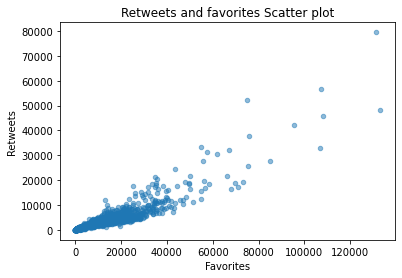

In [163]:
master_dataset.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');

## Source used to share dog photos ##

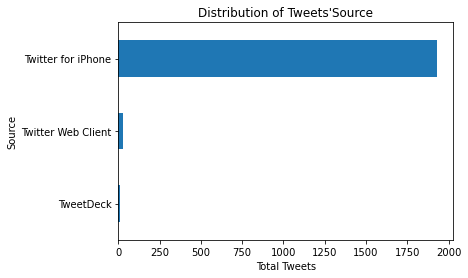

In [164]:
plt.title("Distribution of Tweets'Source")
master_dataset.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('Source');

## Most common dog_stage ##

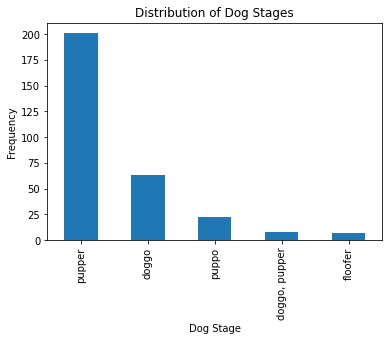

In [165]:
master_dataset.dog_stage.value_counts()[:5].plot(kind = 'bar')
plt.title("Distribution of Dog Stages")
plt.xlabel('Dog Stage')
plt.ylabel('Frequency');

## Number of dogs for each dog rate value ##

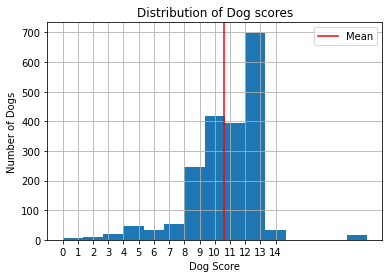

In [166]:
master_dataset.dog_rate.hist(bins=15)
plt.title('Distribution of Dog scores')
plt.xlabel('Dog Score')
plt.ylabel('Number of Dogs')
plt.axvline(x= master_dataset.dog_rate.mean(),color='Red', linestyle='-',label ='Mean')
plt.xticks(np.arange(15))
plt.legend(loc=0);

## Most common dog breed ##

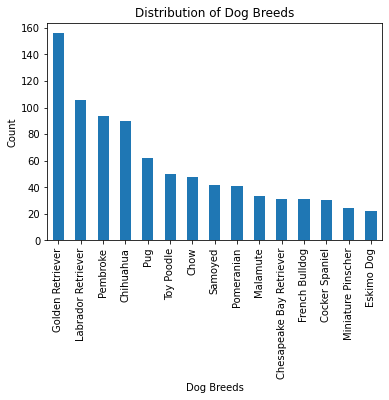

In [167]:
master_dataset.dog_breed.value_counts()[:15].plot(kind = 'bar')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Dog Breeds')
plt.ylabel('Count');

## Account Performance over time ##

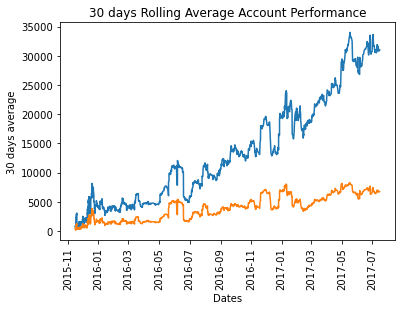

In [169]:
fav= master_dataset.favorite_count.rolling(window = 30).mean()
retw= master_dataset.retweet_count.rolling(window = 30).mean()
x = master_dataset.timestamp
plt.plot(x,fav)
plt.plot(x,retw)
plt.xticks(rotation = 90)
plt.title('30 days Rolling Average Account Performance')
plt.xlabel('Dates')
plt.ylabel('30 days average');